# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        if city_weather["cod"] == 200:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

        # Append the City information into city_data list
            city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        else:
            print(f"City not found. Skipping... (Code: {city_weather['cod']})")
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | luwingu
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | banjar
Processing Record 6 of Set 1 | san jose village
City not found. Skipping... (Code: 404)
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | kailua-kona
Processing Record 17 of Set 1 | taroa
Processing Record 18 of Set 1 | embarcacion
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | san luis de la loma
Processing Record 21 of Set 1 | linxia chengguanzhen
Pr

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [28]:
# Display sample data
print(city_data_df.head())

           City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  longyearbyen  78.2186   15.6401     39.04        65          40   
1   yellowknife  62.4560 -114.3525     62.42        58          40   
2       luwingu -10.2621   29.9271     63.77        49          14   
3         pisco -13.7000  -76.2167     64.45        82         100   
4        banjar  -8.1900  114.9675     76.64        91          28   

   Wind Speed Country        Date  
0       19.57      SJ  1718294516  
1        8.05      CA  1718294474  
2        4.47      ZM  1718294518  
3        2.30      PE  1718294518  
4        3.89      ID  1718294518  


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,39.04,65,40,19.57,SJ,1718294516
1,yellowknife,62.4560,-114.3525,62.42,58,40,8.05,CA,1718294474
2,luwingu,-10.2621,29.9271,63.77,49,14,4.47,ZM,1718294518
3,pisco,-13.7000,-76.2167,64.45,82,100,2.30,PE,1718294518
4,banjar,-8.1900,114.9675,76.64,91,28,3.89,ID,1718294518


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

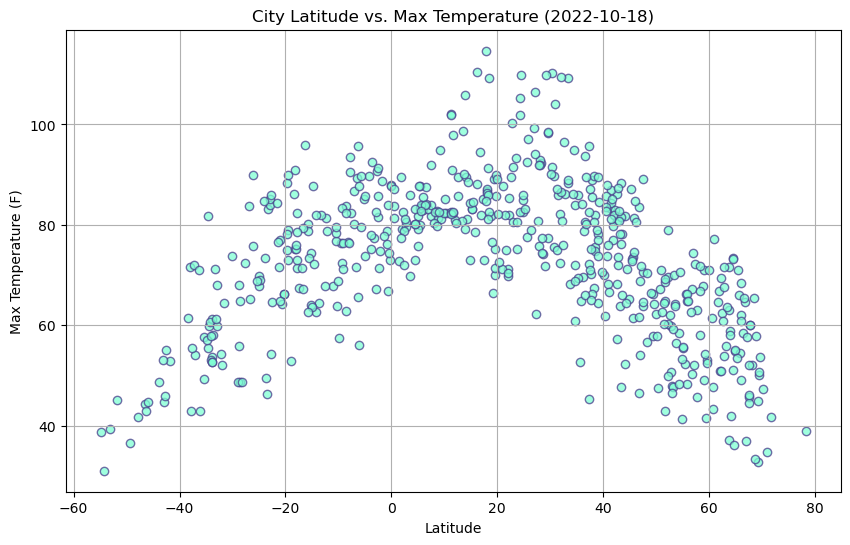

In [31]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],  edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

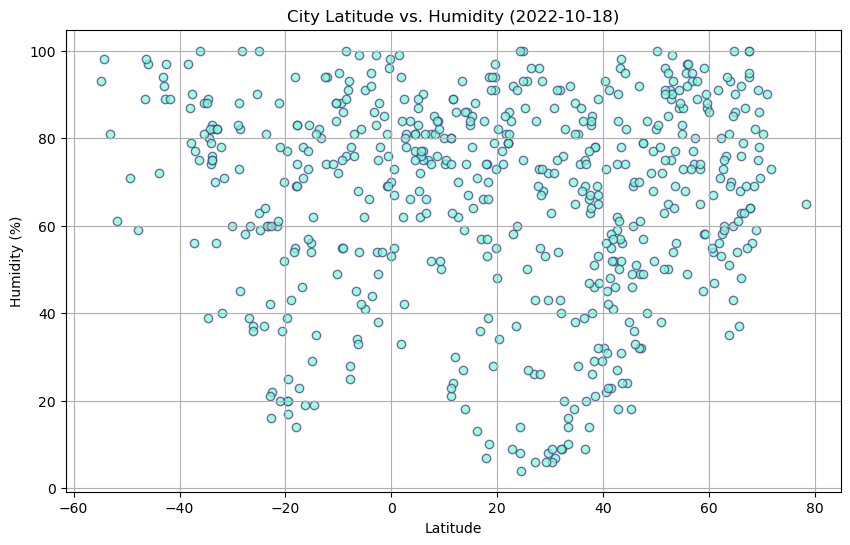

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

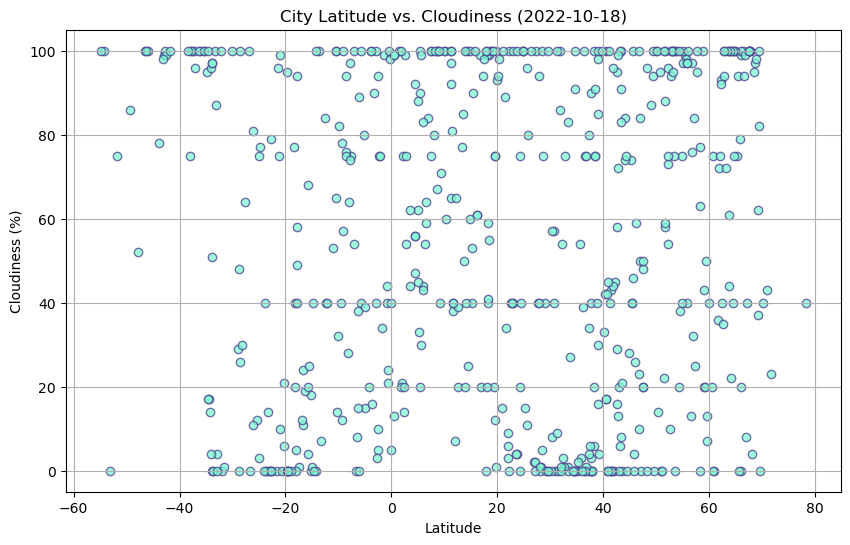

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

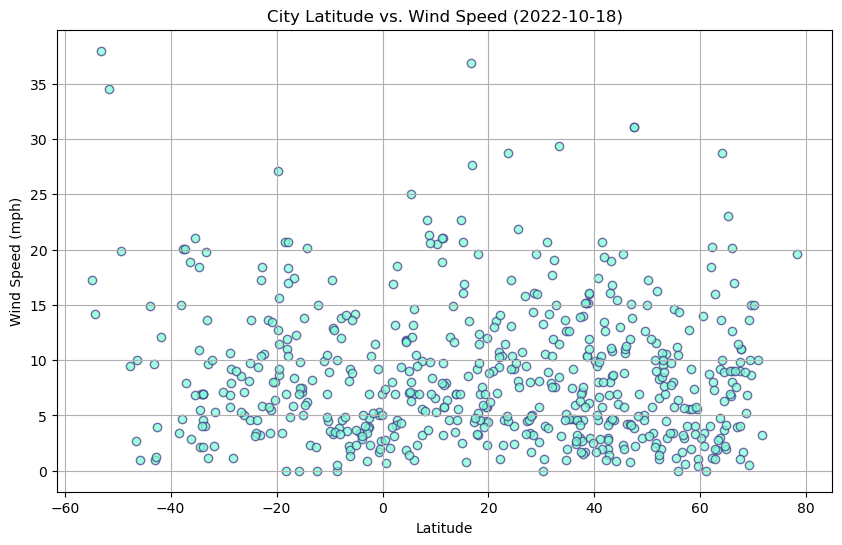

In [34]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, plot_filename):
     """
    Function to create a linear regression plot.

    Parameters:
        x_values (array-like): Values for the independent variable.
        y_values (array-like): Values for the dependent variable.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        plot_filename (str): File name to save the plot.

    Returns:
        None
    """

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,39.04,65,40,19.57,SJ,1718294516
1,yellowknife,62.4560,-114.3525,62.42,58,40,8.05,CA,1718294474
5,bilibino,68.0546,166.4372,52.21,56,4,1.72,RU,1718294518
6,keflavik,64.0049,-22.5624,58.91,93,100,28.77,IS,1718294326
9,ribeira grande,38.5167,-28.7000,75.60,78,75,10.36,PT,1718294518


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,luwingu,-10.2621,29.9271,63.77,49,14,4.47,ZM,1718294518
3,pisco,-13.7000,-76.2167,64.45,82,100,2.30,PE,1718294518
4,banjar,-8.1900,114.9675,76.64,91,28,3.89,ID,1718294518
7,hermanus,-34.4187,19.2345,59.81,80,17,2.19,ZA,1718294316
8,adamstown,-25.0660,-130.1015,67.75,63,3,9.75,PN,1718294518


###  Temperature vs. Latitude Linear Regression Plot

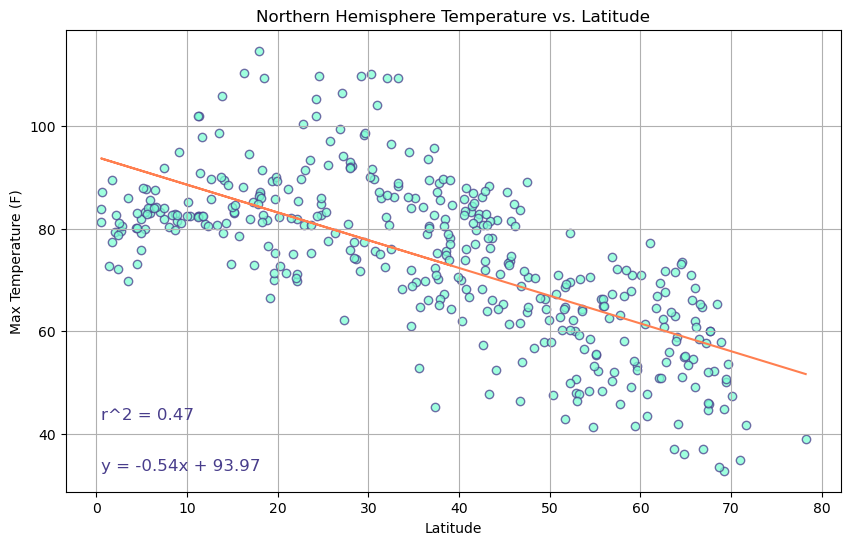

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Northern Hemisphere Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), min(y_values) + 10), fontsize=12, color="darkslateblue")
plt.savefig("../Fig5.png")
plt.show()

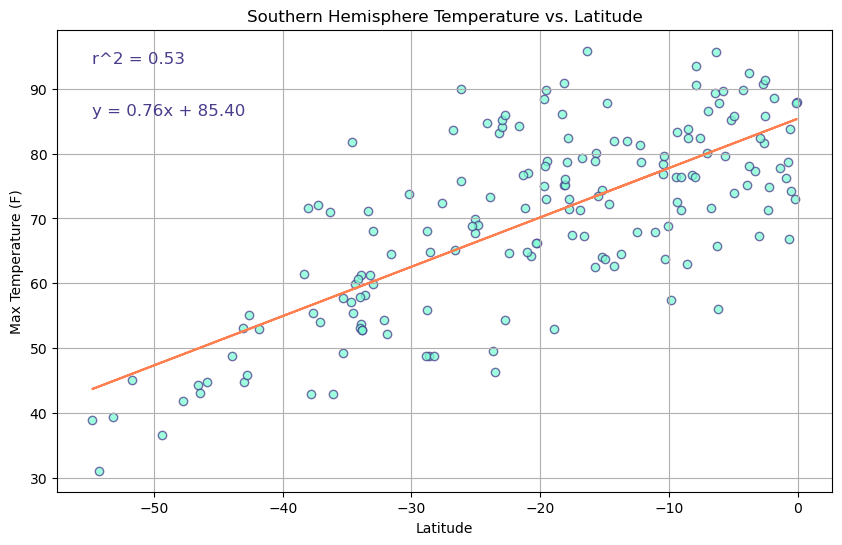

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Southern Hemisphere Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)-2), fontsize=12, color="darkslateblue")
plt.savefig("../Fig6.png")
plt.show()

**Discussion about the linear relationship:** These plots demonstrate that as you get closer to the equator, the max temperature increases. This demonstrated by the strong r^2 value and is because the equator is located at 0 latitude.

### Humidity vs. Latitude Linear Regression Plot

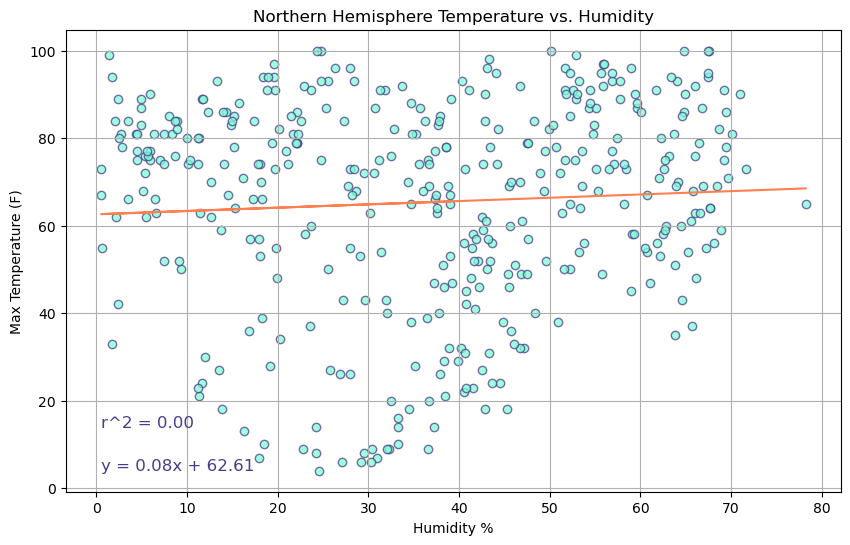

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Northern Hemisphere Temperature vs. Humidity")
plt.xlabel("Humidity %")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), min(y_values) + 10), fontsize=12, color="darkslateblue")
plt.savefig("../Fig6.png")
plt.show()

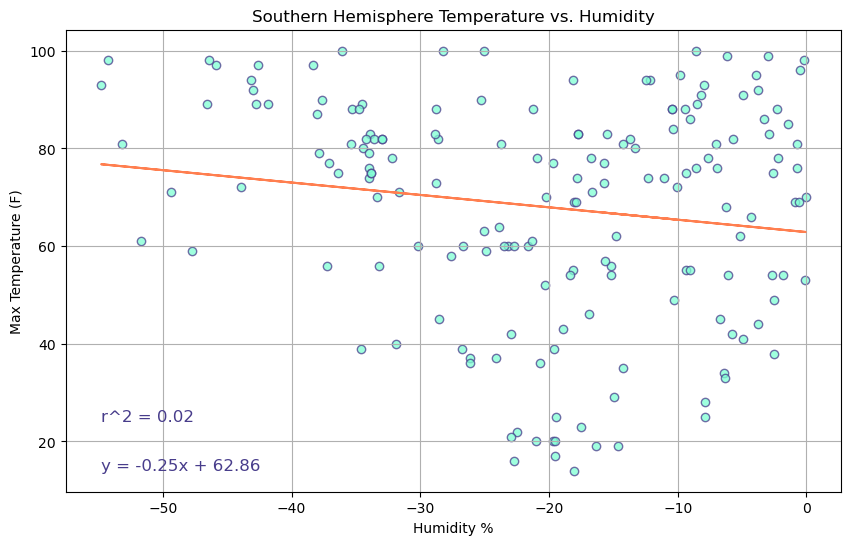

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Southern Hemisphere Temperature vs. Humidity")
plt.xlabel("Humidity %")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), min(y_values) + 10), fontsize=12, color="darkslateblue")
plt.savefig("../Fig7.png")
plt.show()

**Discussion about the linear relationship:** These visuals demonstrate that there is no relationship between temperature and humidity and is supported by the weak r^2 value.

### Cloudiness vs. Latitude Linear Regression Plot

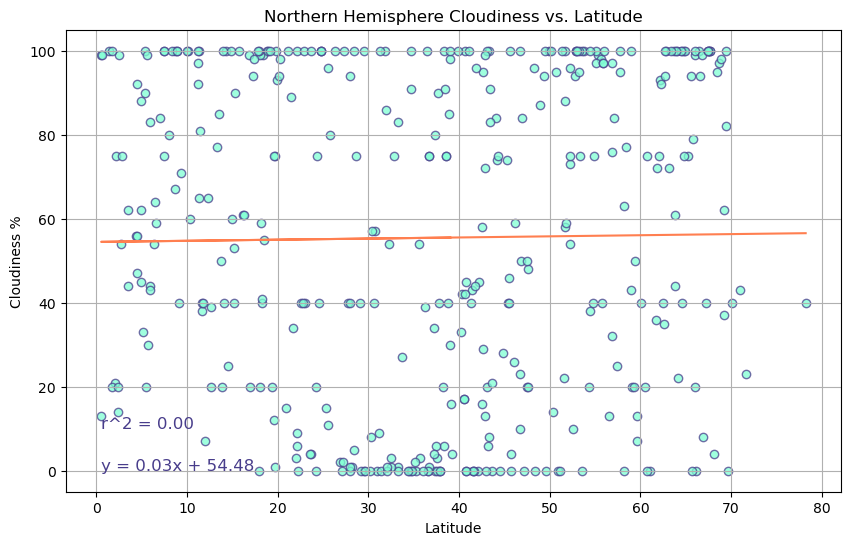

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), min(y_values) + 10), fontsize=12, color="darkslateblue")
plt.savefig("../Fig8.png")
plt.show()

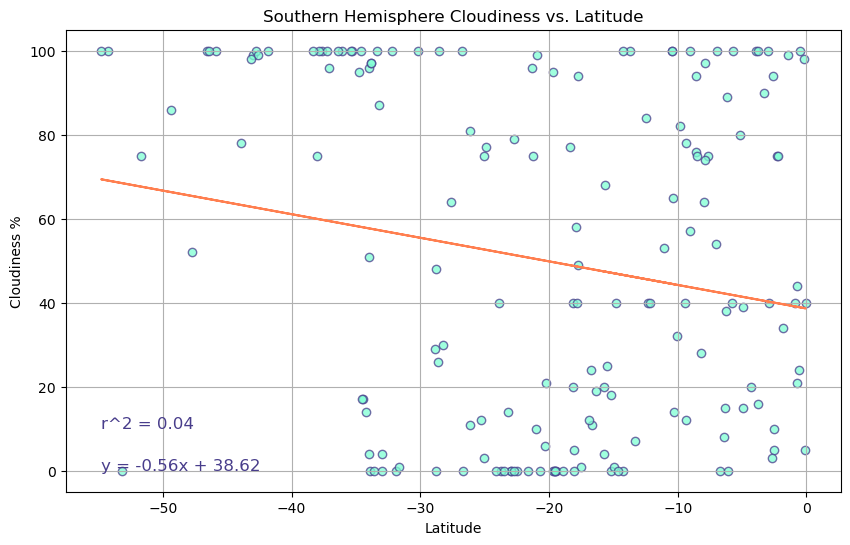

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), min(y_values) + 10), fontsize=12, color="darkslateblue")
plt.savefig("../Fig9.png")
plt.show()

**Discussion about the linear relationship:** Based on the weak r^2 value and the range of plots, it is clear that there is no relationship between latitude and cloudiness %

### Wind Speed vs. Latitude Linear Regression Plot

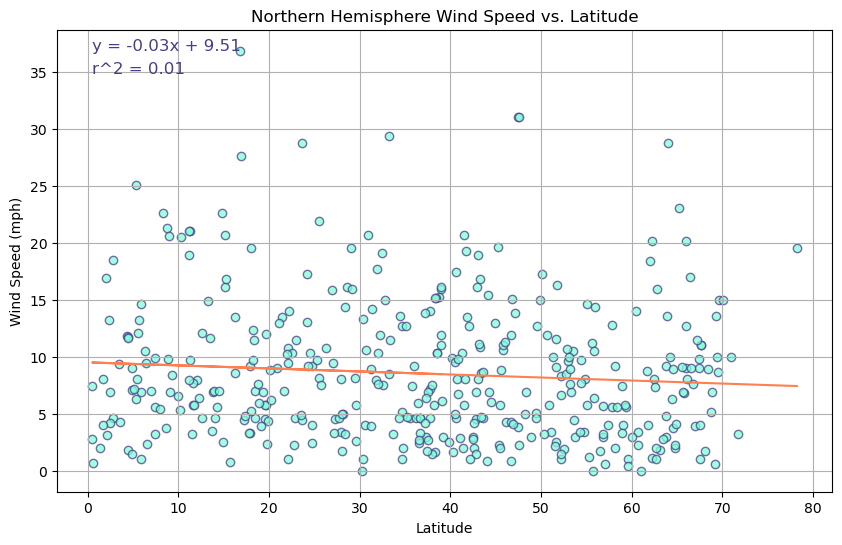

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)-2), fontsize=12, color="darkslateblue")
plt.savefig("../Fig10.png")
plt.show()

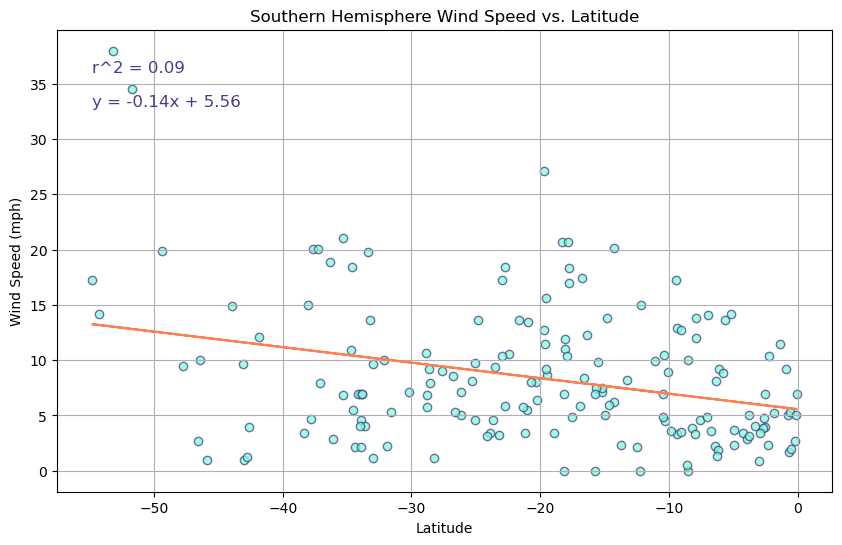

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, edgecolors="darkslateblue", facecolors="aquamarine", alpha=0.75)
plt.plot(x_values, regression_line, color="coral", linestyle="-")
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 5), fontsize=12, color="darkslateblue")
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)-2), fontsize=12, color="darkslateblue")
plt.savefig("../Fig11.png")
plt.show()

**Discussion about the linear relationship:** Based off of the weak r^2 values, we know that there is little relationship between wind speed and latitude across the world.